## First steps: MSG data (Native format)

- Use satpy module for working with MSG data (https://satpy.readthedocs.io/en/stable/index.html)
- Download data from Eumetsat Data Store (https://eoportal.eumetsat.int/userMgmt/protected/welcome.faces)

**Import modules**

In [118]:
from satpy.scene import Scene
from satpy.resample import get_area_def
from satpy.dataset import combine_metadata
from satpy import find_files_and_readers
from satpy.writers import available_writers
from satpy import DataQuery
from datetime import datetime
from pyresample import load_area
import glob
import warnings
import numpy as np
import xarray
import netCDF4

**Read data**
- The SEVIRI Rapid Scan file is delivered in native format (.nat)
- The *seviri_l1b_native* reader for loading the files

In [139]:
# path to file(s)
fname = glob.glob('/Users/nicobader/Downloads/data/*20210711*')
#fname.sort()

# read the file: SEVIRI Rapid Scan (native format)
scn = Scene(reader='seviri_l1b_native', filenames=fname)

['/Users/nicobader/Downloads/data/MSG3-SEVI-MSG15-0100-NA-20210711154915.871000000Z-NA.nat', '/Users/nicobader/Downloads/data/MSG3-SEVI-MSG15-0100-NA-20210711155415.765000000Z-NA.nat', '/Users/nicobader/Downloads/data/MSG3-SEVI-MSG15-0100-NA-20210711154415.976000000Z-NA.nat', '/Users/nicobader/Downloads/data/MSG3-SEVI-MSG15-0100-NA-20210711153416.187000000Z-NA.nat', '/Users/nicobader/Downloads/data/MSG3-SEVI-MSG15-0100-NA-20210711153916.082000000Z-NA.nat', '/Users/nicobader/Downloads/data/MSG3-SEVI-MSG15-0100-NA-20210711155915.659000000Z-NA.nat']


In [132]:
print(scn)

**Generating a composite**

In [133]:
# available composites
scn.available_composite_ids()

[DataID(name='airmass'),
 DataID(name='ash'),
 DataID(name='cloudtop'),
 DataID(name='cloudtop_daytime'),
 DataID(name='colorized_ir_clouds'),
 DataID(name='convection'),
 DataID(name='day_microphysics'),
 DataID(name='day_microphysics_winter'),
 DataID(name='dust'),
 DataID(name='fog'),
 DataID(name='green_snow'),
 DataID(name='hrv_clouds'),
 DataID(name='hrv_fog'),
 DataID(name='hrv_severe_storms'),
 DataID(name='hrv_severe_storms_masked'),
 DataID(name='ir108_3d'),
 DataID(name='ir_cloud_day'),
 DataID(name='ir_overview'),
 DataID(name='ir_sandwich'),
 DataID(name='natural_color'),
 DataID(name='natural_color_nocorr'),
 DataID(name='natural_color_raw'),
 DataID(name='natural_color_with_night_ir'),
 DataID(name='natural_color_with_night_ir_hires'),
 DataID(name='natural_enh'),
 DataID(name='natural_enh_with_night_ir'),
 DataID(name='natural_enh_with_night_ir_hires'),
 DataID(name='natural_with_night_fog'),
 DataID(name='night_fog'),
 DataID(name='night_ir_alpha'),
 DataID(name='night

In [128]:
# load the data as composite
composite = 'convection'
scn.load([composite])

# show the composite
#scn.show(composite)5692

/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
 

**Load Datasets**

In [62]:
# available datasets
scn.all_dataset_ids()

[DataID(name='HRV', wavelength=WavelengthRange(min=0.5, central=0.7, max=0.9, unit='µm'), resolution=1000.134348869, calibration=<calibration.reflectance>, modifiers=()),
 DataID(name='HRV', wavelength=WavelengthRange(min=0.5, central=0.7, max=0.9, unit='µm'), resolution=1000.134348869, calibration=<calibration.radiance>, modifiers=()),
 DataID(name='HRV', wavelength=WavelengthRange(min=0.5, central=0.7, max=0.9, unit='µm'), resolution=1000.134348869, calibration=<calibration.counts>, modifiers=()),
 DataID(name='IR_016', wavelength=WavelengthRange(min=1.5, central=1.64, max=1.78, unit='µm'), resolution=3000.403165817, calibration=<calibration.reflectance>, modifiers=()),
 DataID(name='IR_016', wavelength=WavelengthRange(min=1.5, central=1.64, max=1.78, unit='µm'), resolution=3000.403165817, calibration=<calibration.radiance>, modifiers=()),
 DataID(name='IR_016', wavelength=WavelengthRange(min=1.5, central=1.64, max=1.78, unit='µm'), resolution=3000.403165817, calibration=<calibration

Easy request: Requesting datasets by *name* or *wavelength*

In [63]:
# load the data from datasets
scn.load(['IR_108'])

# show the loaded composite
scn.show('IR_108')

KeyError: "No dataset matching 'DataQuery(name='IR_108')' found"

Detailed request: Requesting datasets by other metadata

In [77]:
my_query = DataQuery(name = ['IR_108','IR_108'], calibration = ['radiance','brightness_temperature'])

scn.load([my_query])

KeyError: "Unknown datasets: {DataQuery(name=('IR_108', 'IR_108'), calibration=('radiance', 'brightness_temperature'))}"

In [113]:
#scn.load(['HRV',1.6,3.9,8.7,9.7,10.8,12.0,13.4,0.6,0.8,6.2,7.3], calibration='radiance')
scn.load([3.9,8.7,9.7,10.8,12.0,13.4,6.2,7.3], calibration='brightness_temperature')
#scn.load(['HRV',1.6,3.9,8.7,9.7,10.8,12.0,13.4,0.6,0.8,6.2,7.3], calibration='counts')
#scn.load(['HRV',1.6,0.6,0.8], calibration='reflectance')

In [112]:
print(scn)

**Combine Datasets**

Example: Calculate NDVI and combine it with the datasets

/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


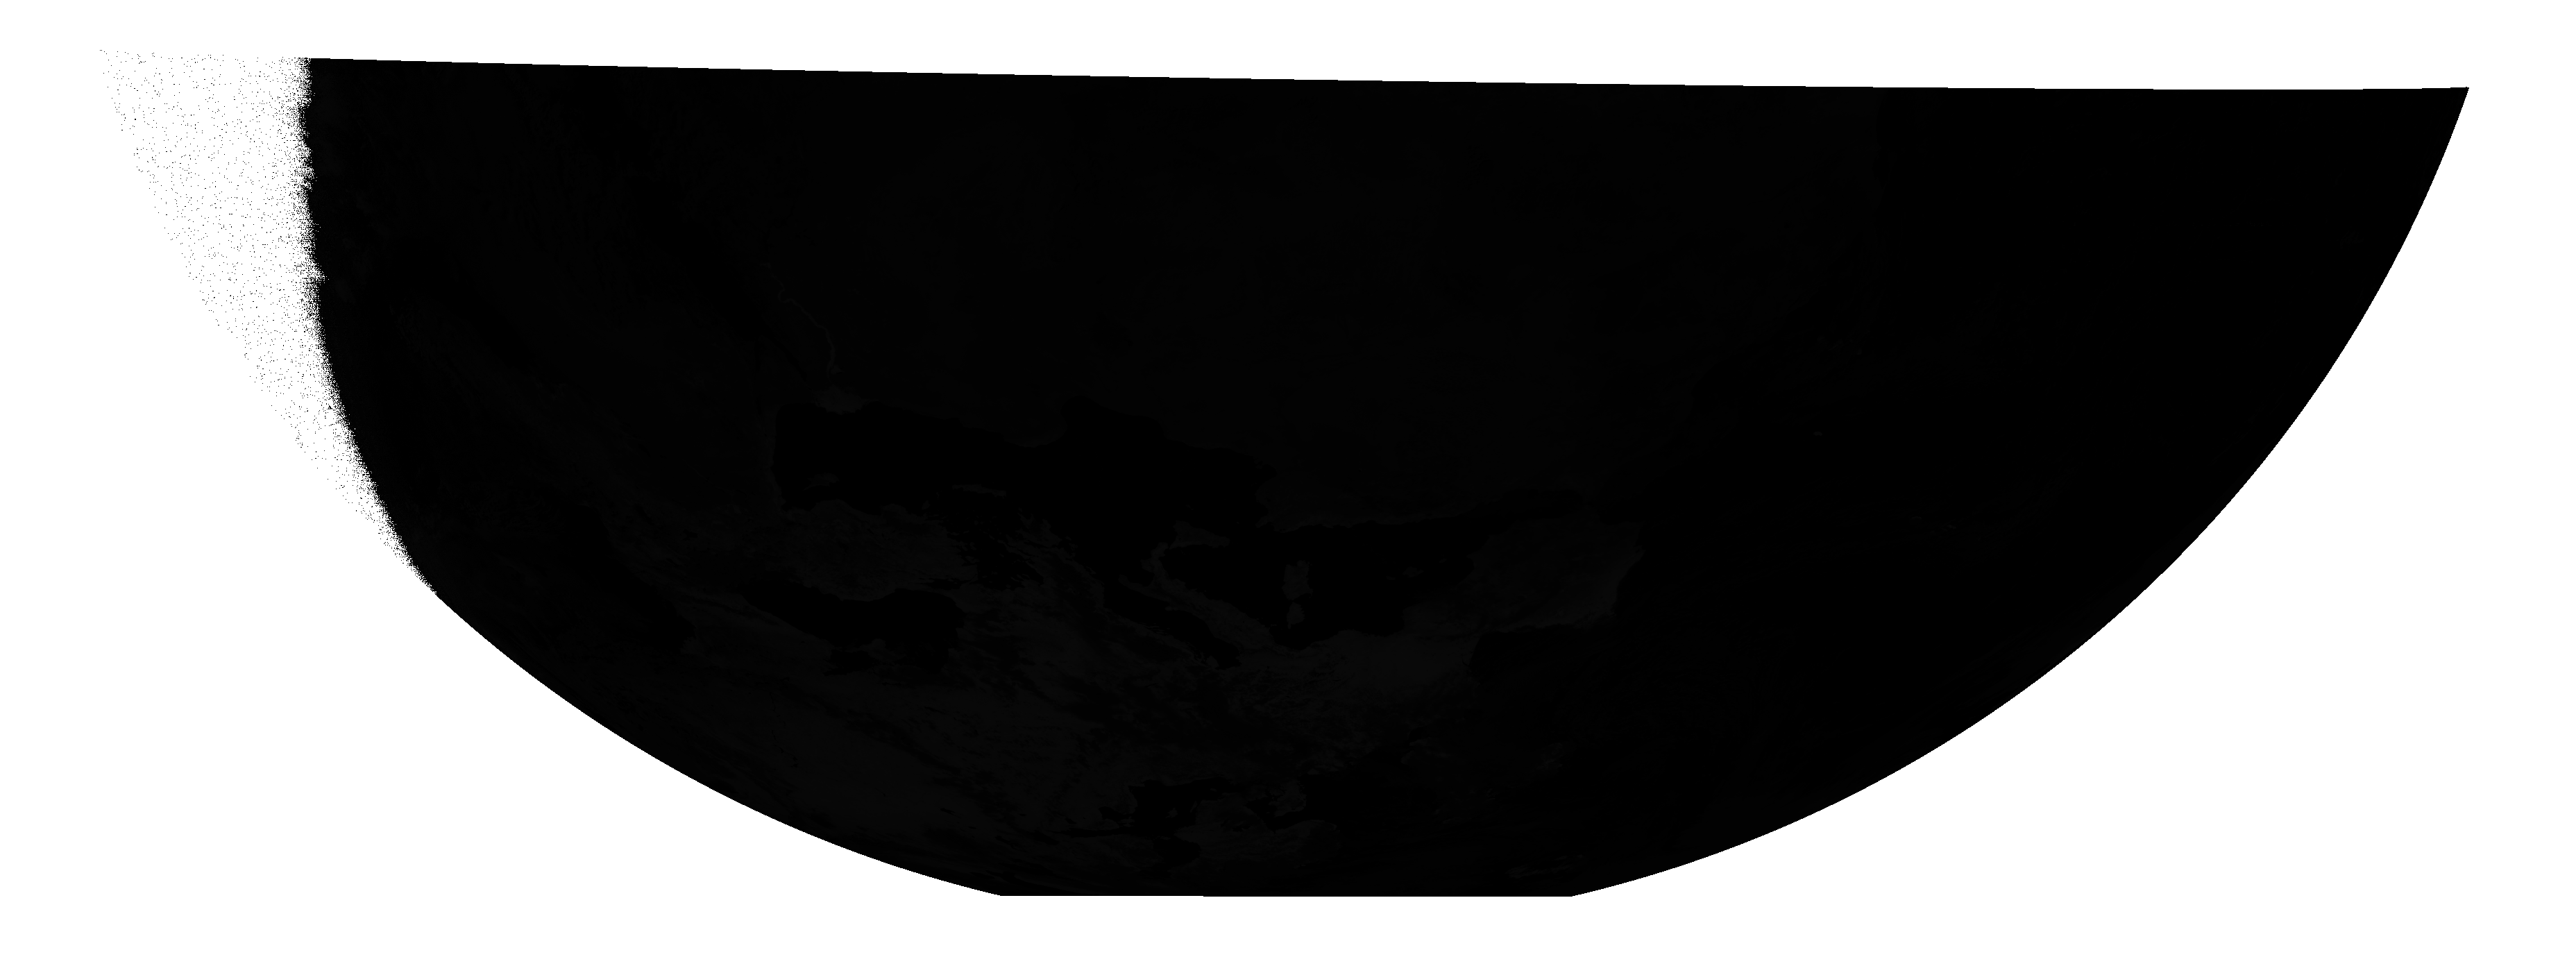

In [8]:
# load needed datasets
scn.load(['VIS006','VIS008'])

# calculate NDVI
ndvi = (scn['VIS008'] - scn['VIS006']) / (scn['VIS008'] + scn['VIS006'])

# Define NDVI dataset
ndvi.attrs = combine_metadata(scn['VIS008'], scn['VIS006'])
scn['ndvi'] = ndvi

# Plot the NDVI
scn.show('ndvi')

**Resampling Datasets**

In [50]:
# load an example dataset
#scn.load(['natural_color'])

# resample data to Germany
local_scn = scn.resample("germ2")
local_scn.show('convection')

/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:337: RuntimeWarning: invalid value encountered in cos
  self.cvertices = np.array([np.cos(self.lat) * np.cos(self.lon),
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:338: RuntimeWarning: invalid value encountered in cos
  np.cos(self.lat) * np.sin(self.lon),
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:338: RuntimeWarning: invalid value encountered in sin
  np.cos(self.lat) * np.sin(self.lon),
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:339: RuntimeWarning: invalid value encountered in sin
  np.sin(self.lat)]).T * radius
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:245: RuntimeWarning: invalid value encountered in double_scalars
  if self.end.lon - self.start.lon > np.pi:
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/pyresample/spherical.py:2

KeyError: "No dataset matching 'DataQuery(name='convection')' found"

**Save files**

In [130]:
scn = scn.resample("euro4")
# netCDF file
scn.save_datasets(filename = 'testfile.nc', base_dir = './', writer = 'cf', engine = 'netcdf4')

/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/satpy/resample.py:498: UserWarning: Upgrade 'pyresample' for a more accurate default 'radius_of_influence'.
  warnings.warn("Upgrade 'pyresample' for a more accurate default 'radius_of_influence'.")
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/satpy/writers/cf_writer.py:740: FutureWarning: The default behaviour of the CF writer will soon change to not compress data by default.
  FutureWarning)
No time dimension in datasets, skipping time bounds creation.
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/Users/nicobader/opt/anaconda3/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: in

[None, None]